# Anomaly Detection of Retail Store Sales

This hands-on mini-project will enable you to reinforce your learnings pertaining to anomaly detection in this unit. By now, you must already be aware of the key objective of anomaly detection. Just to refresh your memory, anomaly detection is the identification of outliers or rare event items in a dataset which potentially exhibit abnormal behavior or properties as compared to the rest of the datapoints.

There are a wide variety of anomaly detection methods including supervised, unsupervised and semi-supervised. Typically you can perform anomaly detection on univariate data, multivariate data as well as data which is temporal in nature. In this mini-project you will leverage state-of-the-art anomaly detection models from frameworks like [__`scikit-learn`__](https://scikit-learn.org/stable/modules/outlier_detection.html) and [__`PyOD`__](https://pyod.readthedocs.io/en/latest/index.html).


By the end of this mini-project, you will have successfully applied these techniques to find out potential outliers pertaining to sales transactional data in a retail store dataset and also learnt how to visualize outliers similar to the following plot.

![](outlier_ex.png)

We will be performing anomaly detection on both univariate and multivariate data and leverage the following anomaly detection techniques.

- Simple Statistical Models (mean & standard deviation: the three-sigma rule)
- Isolation Forest
- Clustering-Based Local Outlier Factor
- Auto-encoders

# 1. Getting and Loading the Dataset

The first step towards solving any data science or machine learning problem is to obtain the necessary data. In this scenario, we will be dealing with a popular retail dataset known as the [SuperStore Sales Dataset](https://community.tableau.com/docs/DOC-1236) which consists of transactional data pertaining to a retail store.

#### Please download the required dataset from [here](https://community.tableau.com/docs/DOC-1236) if necessary, although it will also be provided to you along with this notebook for this mini-project

Once we have the necessary data, we will load up the dataset and perform some initial exploratory data analysis

# 2. Exploratory Data Analysis

It's time to do some basic exploratory analysis on the retail store transactional data. We start by loading up the dataset into a pandas dataframe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


df = pd.read_excel("./Superstore.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We don't have any major missing values in our dataset and we can now look at a sample subset of the data

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Visualize Sales vs. Order Date 

Let's look more closely at the __`Sales`__ attribute of the dataset in the next few cells. We'll start by looking at typical sales over time 

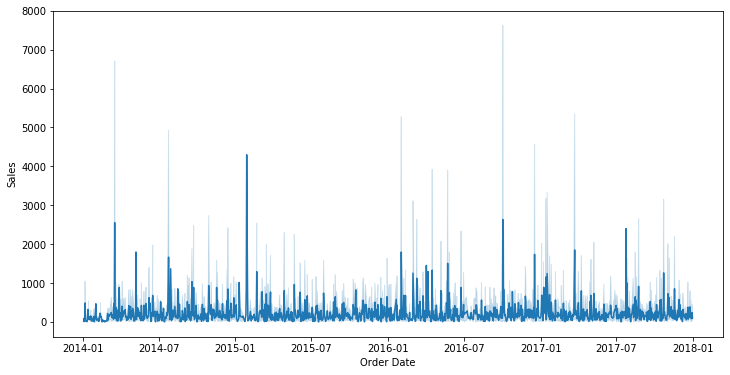

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['Order Date'], y=df['Sales']);

## Visualize Sales Distribution


Let's now look at the data distribution for __`Sales`__

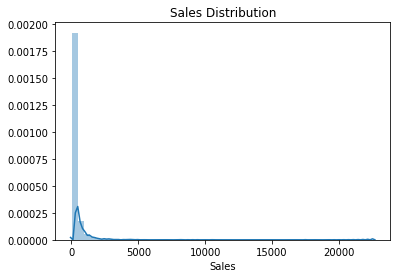

In [ ]:
sns.distplot(df['Sales'])
plt.title("Sales Distribution");

In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

We can definitely see the presence of potential outliers in terms of the min or max values as compared to the meat of the distribution in the interquartile range as observed in the distribution statistics

## Q 2.1: Visualize Profit vs. Order Date 

Let's now look closely at the __`Profit`__ attribute of the dataset in the next few cells. We'll start by looking at typical profits over time.

__Your turn: Plot `Order Date` vs. `Profit` using a line plot__

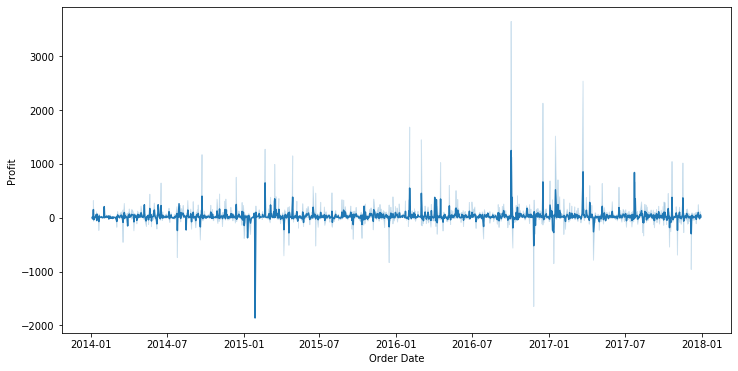

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['Order Date'], y=df['Profit']);

## Q 2.2: Visualize Profit Distribution

Let's now look at the data distribution for __`Profit`__

__Your turn: Plot the distribution for `Profit`__

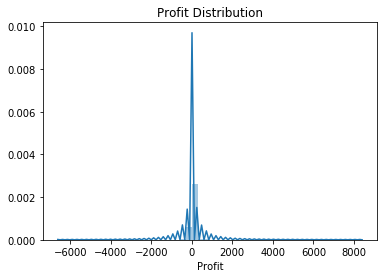

In [ ]:
sns.distplot(df['Profit'])
plt.title("Profit Distribution");

__Your turn: Get the essential descriptive statistics for `Profit` using an appropriate function__

In [ ]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

__Your turn: Do you notice anything interesting about the distribution?__

The distribution is symmetric with center at 0. 

We have both positive and negative values in profits since it indicates either a profit or a loss based on the sales and original price of the items.

## Visualize Discount vs. Profit

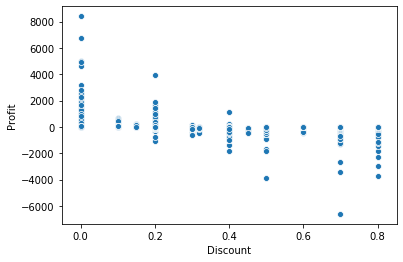

In [ ]:
sns.scatterplot(x="Discount", y="Profit", data=df);

In the above visual, we look at a scatter plot showing the distribution of profits w.r.t discounts given

# 3. Univariate Anomaly Detection

Univariate is basically analysis done on a single attribute or feature. In this section, we will perform anomaly detection on a single attribute using the following methods.

- Statistical Process Control Methods (mean + 3sigma thresholding)
- Isolation Forest

We will start off by demonstrating both these techniques on the __`Sales`__ attribute and later on, you will implement similar techniques on the __`Profit`__ attribute.

## 3.1: Univariate Anomaly Detection on Sales using Statistical Modeling

Here we start off by implementing anomaly detecting using statistical modeling on the __`Sales`__ attribute

### Obtain Upper Limit Threshold for Sales

Here we are concerned about transactions with high sales values so we compute the upper limit using the $\mu$ + 3$\sigma$ rule where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation of the distribution.

In [ ]:
mean_sales = df['Sales'].mean()
sigma_sales = df['Sales'].std()
three_sigma_sales = 3*sigma_sales

threshold_sales_value = mean_sales + three_sigma_sales
print('Threshold Sales:', threshold_sales_value)

Threshold Sales: 2099.5933023565394


### Visualize Outlier Region

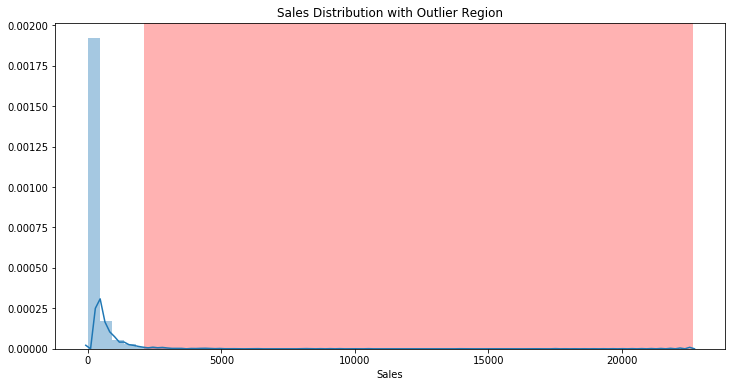

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Sales'])
plt.axvspan(threshold_sales_value, df['Sales'].max(), facecolor='r', alpha=0.3)
plt.title("Sales Distribution with Outlier Region");

### Filter and Sort Outliers

Here we filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
sales_outliers_df = df['Sales'][df['Sales'] > threshold_sales_value]
print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 127


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5300,Springfield,Furniture,Tables,Hon Rectangular Conference Tables,2275.500,10,0.0,386.8350
6101,New York City,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,2254.410,5,0.1,375.7350
4881,Henderson,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
7487,Dover,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
1155,Harrisonburg,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",2244.480,7,0.0,493.7856
8699,Nashville,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,2239.936,8,0.2,223.9936
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
8424,Lakewood,Furniture,Bookcases,"Global Adaptabilites Bookcase, Cherry/Storm Gr...",2154.900,5,0.0,129.2940
6534,Buffalo,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,2152.776,3,0.2,726.5619
8680,Richmond,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2104.550,7,0.0,694.5015


## Q 3.2: Univariate Anomaly Detection on Profit using Statistical Modeling

In this section you will use the learning from Section 3.1 and implement anomaly detecting using statistical modeling on the __`Profit`__ attribute. Since we have both +ve (profits) and -ve (losses) values in the distribution, we will try to find anomalies for each.

### Obtain Upper Limit Threshold for Profit

__Your turn:__ Compute the upper and lower limits using the  𝜇  + 3 𝜎  rule where  𝜇  is the mean of the distribution and  𝜎  is the standard deviation of the distribution.

In [ ]:
mean_profit = df['Profit'].mean()
sigma_profit = df['Profit'].std()
three_sigma_profit = 3*sigma_profit

threshold_profit_upper_limit = mean_profit + three_sigma_profit
threshold_profit_lower_limit = mean_profit - three_sigma_profit

print('Thresholds Profit:', threshold_profit_lower_limit, threshold_profit_upper_limit)

Thresholds Profit: -674.123426765088 731.4372193806576


### Visualize Outlier Regions

__Your turn:__ Visualize the upper and lower outlier regions in the distribution similar to what you did in 3.1

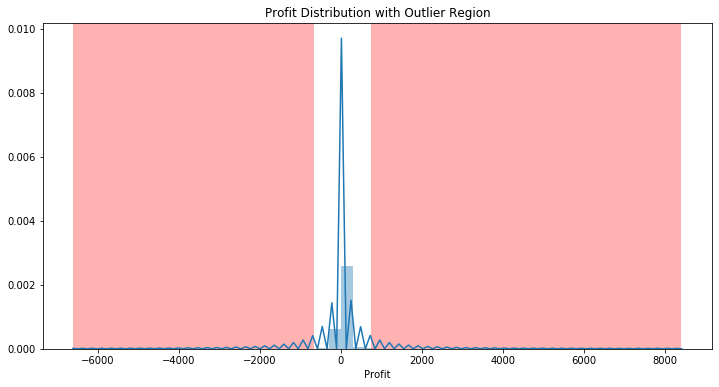

In [ ]:
ig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Profit'])
plt.axvspan(threshold_profit_upper_limit, df['Profit'].max(), facecolor='r', alpha=0.3)
plt.axvspan(threshold_profit_lower_limit, df['Profit'].min(), facecolor='r', alpha=0.3)
plt.title("Profit Distribution with Outlier Region");

### Filter and Sort Outliers

__Your turn:__ Filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
profit_outliers_df = df['Profit'][(df['Profit'] > threshold_profit_upper_limit) | (df['Profit'] < threshold_profit_lower_limit)]
print('Total Profit Outliers:', len(profit_outliers_df))
profit_outliers_sorted = profit_outliers_df.sort_values(ascending=False)
profit_outliers_sorted.head(5)

Total Profit Outliers: 107


6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

### View Top 10 Outlier Transactions

__Your turn:__ View the top ten transactions based on highest profits

In [ ]:
(df.loc[profit_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
509,Atlanta,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
7666,Providence,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568
6520,Jackson,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


### Q: Do you notice any interesting insights based on these transactions?

__A:__ Most of these are purchases for Copiers and Binders , looks like Canon products yielded some good profits`

### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions based on lowest profits (highest losses)

In [ ]:
(df.loc[profit_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


### Q: Do you notice any interesting insights based on these transactions?

__A:__ Most of these are purchases for Machines and Binders , looks like Cibify 3D Printers yielded high losses

## 3.3: Univariate Anomaly Detection on Sales using Isolation Forest

You might have already learnt about this model from the curriculum. Just to briefly recap, the Isolation Forest model,  'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Recursive partitioning can be represented by a tree structure. Hence, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

More details are available in this [User Guide](https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest)

### Initialize and Train Model

Here we initialize the isolation forest model with some hyperparameters assuming the proportion of outliers to be 1% of the total data (using the `contamination` setting)

In [ ]:
from sklearn.ensemble import IsolationForest

sales_ifmodel = IsolationForest(n_estimators=100,
                                contamination=0.01)
sales_ifmodel.fit(df[['Sales']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

### Visualize Outlier Region

Here we visualize the outlier region in the data distribution

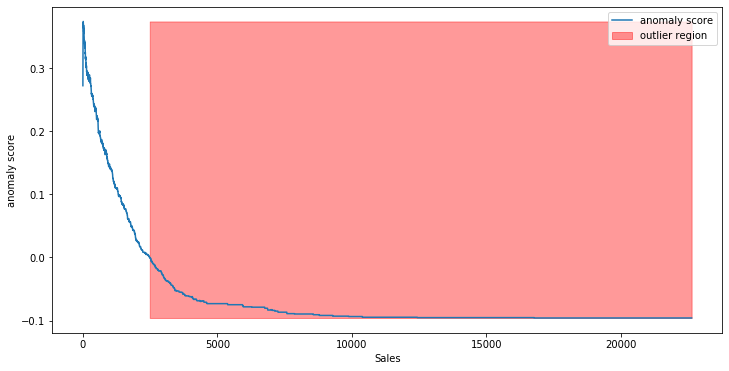

In [ ]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = sales_ifmodel.decision_function(xx)
outlier = sales_ifmodel.predict(xx)
plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales');

### Filter and Sort Outliers

Here we predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
outlier_predictions = sales_ifmodel.predict(df[['Sales']])

sales_outliers_df = df[['Sales']]
sales_outliers_df['Outlier'] = outlier_predictions
sales_outliers_df = sales_outliers_df[sales_outliers_df['Outlier'] == -1]['Sales']

print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 100


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1805,Los Angeles,Technology,Phones,Samsung Galaxy Note 2,2575.944,7,0.2,257.5944
7474,Henderson,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
6884,Minneapolis,Furniture,Chairs,Hon Pagoda Stacking Chairs,2567.840,8,0.0,770.3520
8271,New York City,Furniture,Chairs,Hon 4700 Series Mobuis Mid-Back Task Chairs wi...,2563.056,8,0.1,313.2624
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
6010,Los Angeles,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2548.560,6,0.2,286.7130
7280,Columbia,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2541.980,2,0.0,1270.9900
263,Houston,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.4,-251.9958
7937,Brentwood,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,2518.290,9,0.0,654.7554
3443,New York City,Office Supplies,Appliances,Hoover Shoulder Vac Commercial Portable Vacuum,2504.740,7,0.0,626.1850


## Q 3.4: Univariate Anomaly Detection on Profit using Isolation Forest

In this section you will use the learning from Section 3.3 and implement anomaly detecting using isolation on the __`Profit`__ attribute. Since we have both +ve (profits) and -ve (losses) values in the distribution, we will try to find anomalies for each.

### Initialize and Train Model

__Your Turn:__ Initialize the isolation forest model with similar hyperparameters as Section 3.3 and also assuming the proportion of outliers to be 1% of the total data (using the contamination setting)

In [ ]:
profit_ifmodel = IsolationForest(n_estimators=100,
                                contamination=0.01)
profit_ifmodel.fit(df[['Profit']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

### Visualize Outlier Regions

__Your turn:__ Visualize the upper and lower outlier regions in the distribution similar to what you did in 3.3

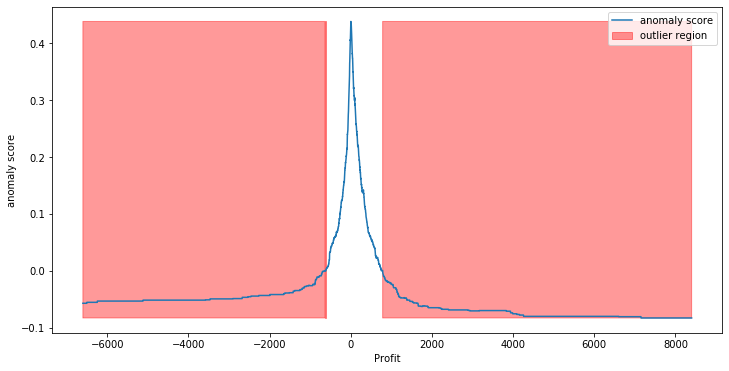

In [ ]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = profit_ifmodel.decision_function(xx)
outlier = profit_ifmodel.predict(xx)
plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit');

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 3.3

In [ ]:
outlier_predictions = profit_ifmodel.predict(df[['Profit']])

profit_outliers_df = df[['Profit']]
profit_outliers_df['Outlier'] = outlier_predictions
profit_outliers_df = profit_outliers_df[profit_outliers_df['Outlier'] == -1]['Profit']

print('Profit Outliers:', len(profit_outliers_df))
profit_outliers_sorted = profit_outliers_df.sort_values(ascending=False)
profit_outliers_sorted.head(5)

Profit Outliers: 96


6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

### View Top 10 Outlier Transactions

__Your turn:__ View the top ten transactions based on highest profits

In [ ]:
(df.loc[profit_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
509,Atlanta,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
7666,Providence,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568
6520,Jackson,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions based on lowest profits (highest losses)

In [ ]:
(df.loc[profit_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


### Q: Do you observe any similarity in the results with the previous method?

__A:__ Yes

Another interesting approach to check out would be the [Generalized ESD Test for Outliers](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm)



# 4. Multivariate Anomaly Detection

Multivariate is basically analysis done on more than one attribute or feature at a time. In this section, we will perform anomaly detection on two attributes (__`Discount`__ & __`Profit`__) using the following methods.

- Clustering Based Local Outlier Factor (CBLOF)
- Isolation Forest
- Auto-Encoders

You will learn how to train these models to detect outliers and also visualize these outliers. For this section we will be using the __[`pyod`](https://pyod.readthedocs.io/en/latest/)__ package so make sure you have it installed.

In [ ]:
!pip install pyod

## Extract Subset Data for Outlier Detection

In [ ]:
cols = ['Discount', 'Profit']
subset_df = df[cols]
subset_df.head()

,Discount,Profit
0,0.00,41.9136
1,0.00,219.5820
2,0.00,6.8714
3,0.45,-383.0310
4,0.20,2.5164


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[cols] = mms.fit_transform(subset_df)
subset_df.head()

,Discount,Profit
0,0.0000,0.442794
1,0.0000,0.454639
2,0.0000,0.440458
3,0.5625,0.414464
4,0.2500,0.440168


## 4.1: Multivariate Anomaly Detection with Clustering Based Local Outlier Factor (CBLOF)

The CBLOF model takes as an input the dataset and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.

By default, kMeans is used for clustering algorithm. You can read more in the [official documentation](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)

### Initialize and Train Model

Here we initialize the CBLOF model with some hyperparameters assuming the proportion of outliers to be 1% of the total data (using the `contamination` setting)

In [ ]:
from pyod.models import cblof

cblof_model = cblof.CBLOF(contamination=0.01, random_state=42)
cblof_model.fit(subset_df)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=1, random_state=42,
   use_weights=False)

### Filter and Sort Outliers

Here we predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
outlier_predictions = cblof_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
463,Phoenix,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.630,6,0.5,-814.4832
4128,Charlotte,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,2624.985,3,0.5,-944.9946
8993,Columbia,Furniture,Tables,Balt Solid Wood Round Tables,1875.258,7,0.4,-968.8833
5320,Knoxville,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2314.116,7,0.4,-1002.7836
165,San Antonio,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
27,Philadelphia,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


We can definitely see some huge losses incurred based on giving higher discounts even if the sales amount was high which is interesting as well as concerning.

## Q 4.2: Multivariate Anomaly Detection with Isolation Forest

Here you will detect anomalies using the Isolation Forest model and use the learnings from 4.1. Here you will use the [`pyod`](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) version of [Isolation Forest](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) which is basically a wrapper over the `scikit-learn` version but with more functionalities.

### Initialize and Train Model

__Your Turn:__ Initialize the isolation forest model with similar hyperparameters as before and also assuming the proportion of outliers to be 1% of the total data (using the contamination setting)

In [ ]:
from pyod.models import iforest

if_model = iforest.IForest(contamination=0.01, random_state=42)
if_model.fit(subset_df)

IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 4.1

In [ ]:
outlier_predictions = if_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions 

In [ ]:
(df.loc[outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                         'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


### Q: Do you notice any differences in the results with the previous model?

We do notice some transactions with 80% discount and high losses

## Q 4.3: Multivariate Anomaly Detection with Auto-encoders

Here you will detect anomalies using the Auto-encoder model and use the learnings from 4.1. Here you will use the [Auto-encoder](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.auto_encoder) model from `pyod` which is a deep learning model often used for learning useful data representations in an unsupervised fashion without any labeled data. 

![](outlier_ae.png)

Similar to PCA, AE could be used to detect outlier objects in the data by calculating the reconstruction errors

### Initialize Model

Here we initiaze an auto-encoder network with a few hidden layers so that we could train it for a 100 epochs

In [ ]:
from pyod.models import auto_encoder

ae_model = auto_encoder.AutoEncoder(hidden_neurons=[2, 32, 32, 2], 
                                    hidden_activation='relu',
                                    output_activation='sigmoid',
                                    epochs=100,
                                    batch_size=32,
                                    contamination=0.01)

Using TensorFlow backend.


### Train Model

__Your turn:__ Train the model by calling the `fit()` function on the right data

In [ ]:
ae_model.fit(subset_df)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

Train on 8994 samples, validate on 1000 samples
Epoch 1/100



  32/8994 [..............................] - ETA: 3:15 - loss: 3.6776

 768/8994 [=>............................] - ETA: 8s - loss: 9.6109  

1760/8994 [====>.........................] - ETA: 3s - loss: 12.8972

2720/8994 [========>.....................] - ETA: 1s - loss: 12.2562

3904/8994 [============>.................] - ETA: 1s - loss: 16.0644

5120/8994 [================>.............] - ETA: 0s - loss: 13.6729

5888/8994 [==================>...........] - ETA: 0s - loss: 12.6375

6880/8994 [=====================>........] - ETA: 0s - loss: 12.1401

7936/8994 [=========================>....] - ETA: 0s - loss: 11.7074

8928/8994 [============================>.] - ETA: 0s - loss: 11.5033

8994/8994 [==============================] - 1s 139us/step - loss: 11.4361 - val_loss: 6.9239


Epoch 2/100
  32/8994 [..............................] - ETA: 0s - loss: 13.2601

1088/8994 [==>...........................] - ETA: 0s - loss: 9.3821 

2272/8994 [======>.......................] - ETA: 0s - loss: 6.4288

3200/8994 [=========>....................] - ETA: 0s - loss: 5.6171

4096/8994 [============>.................] - ETA: 0s - loss: 6.2055

5024/8994 [===============>..............] - ETA: 0s - loss: 8.4621

6112/8994 [===================>..........] - ETA: 0s - loss: 7.8204

7072/8994 [======================>.......] - ETA: 0s - loss: 8.9170

7936/8994 [=========================>....] - ETA: 0s - loss: 8.3762

8928/8994 [============================>.] - ETA: 0s - loss: 7.9030

8994/8994 [==============================] - 0s 54us/step - loss: 7.8590 - val_loss: 5.5889


Epoch 3/100
  32/8994 [..............................] - ETA: 0s - loss: 1.5174

1056/8994 [==>...........................] - ETA: 0s - loss: 4.3626

1824/8994 [=====>........................] - ETA: 0s - loss: 17.1263

2816/8994 [========>.....................] - ETA: 0s - loss: 12.7794

3680/8994 [===========>..................] - ETA: 0s - loss: 10.6318

4544/8994 [==============>...............] - ETA: 0s - loss: 9.4257 

5568/8994 [=================>............] - ETA: 0s - loss: 8.2477

6720/8994 [=====================>........] - ETA: 0s - loss: 7.8773

7680/8994 [========================>.....] - ETA: 0s - loss: 7.2338

8800/8994 [============================>.] - ETA: 0s - loss: 7.6317

8994/8994 [==============================] - 0s 54us/step - loss: 7.5277 - val_loss: 4.8203


Epoch 4/100
  32/8994 [..............................] - ETA: 0s - loss: 2.5286

1056/8994 [==>...........................] - ETA: 0s - loss: 5.3835

2016/8994 [=====>........................] - ETA: 0s - loss: 6.1868

3168/8994 [=========>....................] - ETA: 0s - loss: 4.5968

4192/8994 [============>.................] - ETA: 0s - loss: 5.9875

5216/8994 [================>.............] - ETA: 0s - loss: 5.5928

6464/8994 [====================>.........] - ETA: 0s - loss: 5.8882

7584/8994 [========================>.....] - ETA: 0s - loss: 7.5443

8672/8994 [===========================>..] - ETA: 0s - loss: 6.8806

8994/8994 [==============================] - 0s 50us/step - loss: 6.7256 - val_loss: 4.1855


Epoch 5/100
  32/8994 [..............................] - ETA: 0s - loss: 1.1792

1088/8994 [==>...........................] - ETA: 0s - loss: 12.3169

2336/8994 [======>.......................] - ETA: 0s - loss: 7.1203 

3360/8994 [==========>...................] - ETA: 0s - loss: 8.8908

4480/8994 [=============>................] - ETA: 0s - loss: 7.2960

5504/8994 [=================>............] - ETA: 0s - loss: 6.5036

6528/8994 [====================>.........] - ETA: 0s - loss: 6.7671

7616/8994 [========================>.....] - ETA: 0s - loss: 6.0421

8768/8994 [============================>.] - ETA: 0s - loss: 5.5190

8994/8994 [==============================] - 0s 49us/step - loss: 5.4196 - val_loss: 3.7435


Epoch 6/100
  32/8994 [..............................] - ETA: 0s - loss: 3.1029

 960/8994 [==>...........................] - ETA: 0s - loss: 3.4853

2048/8994 [=====>........................] - ETA: 0s - loss: 3.2628

3264/8994 [=========>....................] - ETA: 0s - loss: 5.6805

4320/8994 [=============>................] - ETA: 0s - loss: 4.7191

5536/8994 [=================>............] - ETA: 0s - loss: 4.1547

6560/8994 [====================>.........] - ETA: 0s - loss: 5.0369

7520/8994 [========================>.....] - ETA: 0s - loss: 5.4838

8512/8994 [===========================>..] - ETA: 0s - loss: 5.0479

8994/8994 [==============================] - 0s 50us/step - loss: 4.9504 - val_loss: 3.3518


Epoch 7/100
  32/8994 [..............................] - ETA: 0s - loss: 2.1863

1056/8994 [==>...........................] - ETA: 0s - loss: 1.1912

2144/8994 [======>.......................] - ETA: 0s - loss: 1.5580

3232/8994 [=========>....................] - ETA: 0s - loss: 3.9538

4384/8994 [=============>................] - ETA: 0s - loss: 3.2636

5344/8994 [================>.............] - ETA: 0s - loss: 3.1142

5952/8994 [==================>...........] - ETA: 0s - loss: 3.2923

6496/8994 [====================>.........] - ETA: 0s - loss: 3.6400

7424/8994 [=======================>......] - ETA: 0s - loss: 4.0833

8544/8994 [===========================>..] - ETA: 0s - loss: 4.3232

8994/8994 [==============================] - 1s 56us/step - loss: 4.1862 - val_loss: 3.0260


Epoch 8/100
  32/8994 [..............................] - ETA: 0s - loss: 1.3294

 960/8994 [==>...........................] - ETA: 0s - loss: 1.4355

1888/8994 [=====>........................] - ETA: 0s - loss: 1.5245

2848/8994 [========>.....................] - ETA: 0s - loss: 1.5226

3840/8994 [===========>..................] - ETA: 0s - loss: 1.6405

4704/8994 [==============>...............] - ETA: 0s - loss: 1.8285

5600/8994 [=================>............] - ETA: 0s - loss: 4.4799

6560/8994 [====================>.........] - ETA: 0s - loss: 4.3088

7552/8994 [========================>.....] - ETA: 0s - loss: 4.3806

8544/8994 [===========================>..] - ETA: 0s - loss: 4.2824



8994/8994 [==============================] - 1s 56us/step - loss: 4.1207 - val_loss: 2.7350


Epoch 9/100
  32/8994 [..............................] - ETA: 0s - loss: 1.7632

 896/8994 [=>............................] - ETA: 0s - loss: 1.5492

1856/8994 [=====>........................] - ETA: 0s - loss: 5.4316

3008/8994 [=========>....................] - ETA: 0s - loss: 4.6273

4128/8994 [============>.................] - ETA: 0s - loss: 4.5862

5056/8994 [===============>..............] - ETA: 0s - loss: 4.0632

6048/8994 [===================>..........] - ETA: 0s - loss: 4.0440

7104/8994 [======================>.......] - ETA: 0s - loss: 3.8474

8160/8994 [==========================>...] - ETA: 0s - loss: 3.5090

8994/8994 [==============================] - 0s 52us/step - loss: 3.3493 - val_loss: 2.5117


Epoch 10/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7811

1248/8994 [===>..........................] - ETA: 0s - loss: 5.7004

2112/8994 [======>.......................] - ETA: 0s - loss: 6.0331

3168/8994 [=========>....................] - ETA: 0s - loss: 4.5600

4064/8994 [============>.................] - ETA: 0s - loss: 4.7017

5056/8994 [===============>..............] - ETA: 0s - loss: 3.9949

6144/8994 [===================>..........] - ETA: 0s - loss: 3.8507

7264/8994 [=======================>......] - ETA: 0s - loss: 3.4145

8352/8994 [==========================>...] - ETA: 0s - loss: 3.2968

8994/8994 [==============================] - 0s 52us/step - loss: 3.1507 - val_loss: 2.3062


Epoch 11/100
  32/8994 [..............................] - ETA: 1s - loss: 0.4886

 896/8994 [=>............................] - ETA: 0s - loss: 1.0713

2144/8994 [======>.......................] - ETA: 0s - loss: 2.0751

3296/8994 [=========>....................] - ETA: 0s - loss: 2.5020

4384/8994 [=============>................] - ETA: 0s - loss: 3.4622

5536/8994 [=================>............] - ETA: 0s - loss: 4.5406

6528/8994 [====================>.........] - ETA: 0s - loss: 4.0327

7328/8994 [=======================>......] - ETA: 0s - loss: 3.7842

8576/8994 [===========================>..] - ETA: 0s - loss: 3.3856

8994/8994 [==============================] - 0s 50us/step - loss: 3.2946 - val_loss: 2.1016


Epoch 12/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7315

1088/8994 [==>...........................] - ETA: 0s - loss: 4.7336

2112/8994 [======>.......................] - ETA: 0s - loss: 3.7983

3296/8994 [=========>....................] - ETA: 0s - loss: 3.2422

4128/8994 [============>.................] - ETA: 0s - loss: 3.1933

5248/8994 [================>.............] - ETA: 0s - loss: 2.7818

6368/8994 [====================>.........] - ETA: 0s - loss: 2.5983

7584/8994 [========================>.....] - ETA: 0s - loss: 2.9498

8512/8994 [===========================>..] - ETA: 0s - loss: 2.7082

8994/8994 [==============================] - 0s 51us/step - loss: 2.6648 - val_loss: 1.9484


Epoch 13/100
  32/8994 [..............................] - ETA: 0s - loss: 1.4613

1024/8994 [==>...........................] - ETA: 0s - loss: 7.5466

2208/8994 [======>.......................] - ETA: 0s - loss: 4.0623

3424/8994 [==========>...................] - ETA: 0s - loss: 3.5673

4448/8994 [=============>................] - ETA: 0s - loss: 3.1684

5312/8994 [================>.............] - ETA: 0s - loss: 2.8832

6336/8994 [====================>.........] - ETA: 0s - loss: 2.6544

7456/8994 [=======================>......] - ETA: 0s - loss: 2.4151

8512/8994 [===========================>..] - ETA: 0s - loss: 2.6338

8994/8994 [==============================] - 0s 53us/step - loss: 2.5348 - val_loss: 1.8096


Epoch 14/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8520

1120/8994 [==>...........................] - ETA: 0s - loss: 0.8346

2304/8994 [======>.......................] - ETA: 0s - loss: 1.3822

3360/8994 [==========>...................] - ETA: 0s - loss: 2.2077

4352/8994 [=============>................] - ETA: 0s - loss: 3.1431

5568/8994 [=================>............] - ETA: 0s - loss: 2.9544

6400/8994 [====================>.........] - ETA: 0s - loss: 2.7174

7456/8994 [=======================>......] - ETA: 0s - loss: 2.4758

8480/8994 [===========================>..] - ETA: 0s - loss: 2.2907

8994/8994 [==============================] - 0s 51us/step - loss: 2.3223 - val_loss: 1.6918


Epoch 15/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6960

1120/8994 [==>...........................] - ETA: 0s - loss: 0.9391

2048/8994 [=====>........................] - ETA: 0s - loss: 1.7085

3168/8994 [=========>....................] - ETA: 0s - loss: 2.1898

4416/8994 [=============>................] - ETA: 0s - loss: 2.8370

5696/8994 [=================>............] - ETA: 0s - loss: 2.4275

6720/8994 [=====================>........] - ETA: 0s - loss: 2.1860

7808/8994 [=========================>....] - ETA: 0s - loss: 2.0471

8672/8994 [===========================>..] - ETA: 0s - loss: 2.0652

8994/8994 [==============================] - 0s 50us/step - loss: 2.0139 - val_loss: 1.5904


Epoch 16/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6698

 768/8994 [=>............................] - ETA: 0s - loss: 1.0853

1824/8994 [=====>........................] - ETA: 0s - loss: 1.2052

2752/8994 [========>.....................] - ETA: 0s - loss: 1.4052

3840/8994 [===========>..................] - ETA: 0s - loss: 1.9287

4992/8994 [===============>..............] - ETA: 0s - loss: 2.3243

6272/8994 [===================>..........] - ETA: 0s - loss: 2.1772

7360/8994 [=======================>......] - ETA: 0s - loss: 1.9536

8224/8994 [==========================>...] - ETA: 0s - loss: 1.8433

8994/8994 [==============================] - 0s 51us/step - loss: 1.9302 - val_loss: 1.4993


Epoch 17/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5207

 992/8994 [==>...........................] - ETA: 0s - loss: 2.1437

2048/8994 [=====>........................] - ETA: 0s - loss: 1.4212

2944/8994 [========>.....................] - ETA: 0s - loss: 1.2426

3968/8994 [============>.................] - ETA: 0s - loss: 1.6998

5088/8994 [===============>..............] - ETA: 0s - loss: 1.5066

6144/8994 [===================>..........] - ETA: 0s - loss: 1.4367

7296/8994 [=======================>......] - ETA: 0s - loss: 1.4843

8416/8994 [===========================>..] - ETA: 0s - loss: 1.7745

8994/8994 [==============================] - 0s 51us/step - loss: 1.7212 - val_loss: 1.4195


Epoch 18/100
  32/8994 [..............................] - ETA: 0s - loss: 2.8195

1024/8994 [==>...........................] - ETA: 0s - loss: 2.5618

2048/8994 [=====>........................] - ETA: 0s - loss: 1.8807

3008/8994 [=========>....................] - ETA: 0s - loss: 1.5153

3968/8994 [============>.................] - ETA: 0s - loss: 1.3666

4928/8994 [===============>..............] - ETA: 0s - loss: 1.2574

6016/8994 [===================>..........] - ETA: 0s - loss: 1.1581

7168/8994 [======================>.......] - ETA: 0s - loss: 1.7719

8416/8994 [===========================>..] - ETA: 0s - loss: 1.6929

8994/8994 [==============================] - 0s 50us/step - loss: 1.7526 - val_loss: 1.3412


Epoch 19/100


  32/8994 [..............................] - ETA: 1s - loss: 0.5823

1120/8994 [==>...........................] - ETA: 0s - loss: 0.7626

2304/8994 [======>.......................] - ETA: 0s - loss: 0.8707

3200/8994 [=========>....................] - ETA: 0s - loss: 0.8771

4192/8994 [============>.................] - ETA: 0s - loss: 0.9009

5184/8994 [================>.............] - ETA: 0s - loss: 1.0251

6272/8994 [===================>..........] - ETA: 0s - loss: 1.2854

7328/8994 [=======================>......] - ETA: 0s - loss: 1.6453

8416/8994 [===========================>..] - ETA: 0s - loss: 1.5232

8994/8994 [==============================] - 0s 51us/step - loss: 1.5357 - val_loss: 1.2797


Epoch 20/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4453

 992/8994 [==>...........................] - ETA: 0s - loss: 1.1981

2272/8994 [======>.......................] - ETA: 0s - loss: 0.9412

3328/8994 [==========>...................] - ETA: 0s - loss: 0.9580

4064/8994 [============>.................] - ETA: 0s - loss: 1.7877

5088/8994 [===============>..............] - ETA: 0s - loss: 1.5854

6240/8994 [===================>..........] - ETA: 0s - loss: 1.5771

7264/8994 [=======================>......] - ETA: 0s - loss: 1.6221

8256/8994 [==========================>...] - ETA: 0s - loss: 1.5328

8994/8994 [==============================] - 0s 52us/step - loss: 1.4876 - val_loss: 1.2248


Epoch 21/100
  32/8994 [..............................] - ETA: 0s - loss: 1.1137

1184/8994 [==>...........................] - ETA: 0s - loss: 1.3061

2240/8994 [======>.......................] - ETA: 0s - loss: 1.1043

3232/8994 [=========>....................] - ETA: 0s - loss: 1.0054

4320/8994 [=============>................] - ETA: 0s - loss: 1.4733

5472/8994 [=================>............] - ETA: 0s - loss: 1.6375

6624/8994 [=====================>........] - ETA: 0s - loss: 1.5735

7584/8994 [========================>.....] - ETA: 0s - loss: 1.4880

8608/8994 [===========================>..] - ETA: 0s - loss: 1.3940

8994/8994 [==============================] - 0s 50us/step - loss: 1.3638 - val_loss: 1.1813


Epoch 22/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8340

1152/8994 [==>...........................] - ETA: 0s - loss: 0.8849

2144/8994 [======>.......................] - ETA: 0s - loss: 0.9053

2944/8994 [========>.....................] - ETA: 0s - loss: 1.2555

3872/8994 [===========>..................] - ETA: 0s - loss: 1.2359

5024/8994 [===============>..............] - ETA: 0s - loss: 1.3107

6112/8994 [===================>..........] - ETA: 0s - loss: 1.2412

7328/8994 [=======================>......] - ETA: 0s - loss: 1.4457

8384/8994 [==========================>...] - ETA: 0s - loss: 1.3671

8994/8994 [==============================] - 0s 51us/step - loss: 1.3130 - val_loss: 1.1418


Epoch 23/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8676

1056/8994 [==>...........................] - ETA: 0s - loss: 0.7318

2112/8994 [======>.......................] - ETA: 0s - loss: 0.9952

3040/8994 [=========>....................] - ETA: 0s - loss: 1.3822

3808/8994 [===========>..................] - ETA: 0s - loss: 1.2306

4832/8994 [===============>..............] - ETA: 0s - loss: 1.2013

5856/8994 [==================>...........] - ETA: 0s - loss: 1.1533

7072/8994 [======================>.......] - ETA: 0s - loss: 1.2682

8064/8994 [=========================>....] - ETA: 0s - loss: 1.3087

8994/8994 [==============================] - 0s 53us/step - loss: 1.2551 - val_loss: 1.1092


Epoch 24/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7086

1152/8994 [==>...........................] - ETA: 0s - loss: 0.9515

2304/8994 [======>.......................] - ETA: 0s - loss: 1.2208

3328/8994 [==========>...................] - ETA: 0s - loss: 1.0709

4128/8994 [============>.................] - ETA: 0s - loss: 1.0650

5152/8994 [================>.............] - ETA: 0s - loss: 1.0111

6144/8994 [===================>..........] - ETA: 0s - loss: 1.0213

6976/8994 [======================>.......] - ETA: 0s - loss: 1.0350

7872/8994 [=========================>....] - ETA: 0s - loss: 1.0669

8768/8994 [============================>.] - ETA: 0s - loss: 1.1792

8994/8994 [==============================] - 0s 55us/step - loss: 1.2139 - val_loss: 1.0824


Epoch 25/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5778

 960/8994 [==>...........................] - ETA: 0s - loss: 0.8194

1920/8994 [=====>........................] - ETA: 0s - loss: 1.0150

3104/8994 [=========>....................] - ETA: 0s - loss: 1.0460

4256/8994 [=============>................] - ETA: 0s - loss: 1.1289

5024/8994 [===============>..............] - ETA: 0s - loss: 1.0589

6144/8994 [===================>..........] - ETA: 0s - loss: 0.9882

7360/8994 [=======================>......] - ETA: 0s - loss: 0.9361

8288/8994 [==========================>...] - ETA: 0s - loss: 1.0418

8994/8994 [==============================] - 0s 52us/step - loss: 1.1773 - val_loss: 1.0610


Epoch 26/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4270

1088/8994 [==>...........................] - ETA: 0s - loss: 0.7496

2112/8994 [======>.......................] - ETA: 0s - loss: 1.0844

3168/8994 [=========>....................] - ETA: 0s - loss: 1.0235

4096/8994 [============>.................] - ETA: 0s - loss: 1.2020

5024/8994 [===============>..............] - ETA: 0s - loss: 1.1402

6144/8994 [===================>..........] - ETA: 0s - loss: 1.0944

7232/8994 [=======================>......] - ETA: 0s - loss: 1.1343

8288/8994 [==========================>...] - ETA: 0s - loss: 1.1788

8994/8994 [==============================] - 0s 51us/step - loss: 1.1573 - val_loss: 1.0332


Epoch 27/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7207

 896/8994 [=>............................] - ETA: 0s - loss: 0.7306

1888/8994 [=====>........................] - ETA: 0s - loss: 0.7888

2912/8994 [========>.....................] - ETA: 0s - loss: 1.4234

3968/8994 [============>.................] - ETA: 0s - loss: 1.3349

4896/8994 [===============>..............] - ETA: 0s - loss: 1.2211

5856/8994 [==================>...........] - ETA: 0s - loss: 1.1487

6624/8994 [=====================>........] - ETA: 0s - loss: 1.1154

7520/8994 [========================>.....] - ETA: 0s - loss: 1.1106

8512/8994 [===========================>..] - ETA: 0s - loss: 1.1381

8994/8994 [==============================] - 1s 57us/step - loss: 1.1159 - val_loss: 1.0170


Epoch 28/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7498

1024/8994 [==>...........................] - ETA: 0s - loss: 0.7833

2048/8994 [=====>........................] - ETA: 0s - loss: 1.1730

3008/8994 [=========>....................] - ETA: 0s - loss: 1.0595

4096/8994 [============>.................] - ETA: 0s - loss: 1.1608

5184/8994 [================>.............] - ETA: 0s - loss: 1.0580

6080/8994 [===================>..........] - ETA: 0s - loss: 1.0653

7008/8994 [======================>.......] - ETA: 0s - loss: 1.0396

7840/8994 [=========================>....] - ETA: 0s - loss: 1.0440

8608/8994 [===========================>..] - ETA: 0s - loss: 1.1462

8994/8994 [==============================] - 1s 56us/step - loss: 1.1203 - val_loss: 1.0002


Epoch 29/100


  32/8994 [..............................] - ETA: 1s - loss: 0.3617

 992/8994 [==>...........................] - ETA: 0s - loss: 0.7218

1696/8994 [====>.........................] - ETA: 0s - loss: 1.2068

2656/8994 [=======>......................] - ETA: 0s - loss: 1.1149

3584/8994 [==========>...................] - ETA: 0s - loss: 1.0239

4544/8994 [==============>...............] - ETA: 0s - loss: 0.9799

5568/8994 [=================>............] - ETA: 0s - loss: 0.9621

6496/8994 [====================>.........] - ETA: 0s - loss: 1.0079

7520/8994 [========================>.....] - ETA: 0s - loss: 0.9787

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0954

8994/8994 [==============================] - 1s 57us/step - loss: 1.0768 - val_loss: 0.9898


Epoch 30/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0621

 896/8994 [=>............................] - ETA: 0s - loss: 1.3314

1728/8994 [====>.........................] - ETA: 0s - loss: 1.0333

2272/8994 [======>.......................] - ETA: 0s - loss: 0.9331

3200/8994 [=========>....................] - ETA: 0s - loss: 1.0204

4352/8994 [=============>................] - ETA: 0s - loss: 0.9816

5376/8994 [================>.............] - ETA: 0s - loss: 1.1541

6400/8994 [====================>.........] - ETA: 0s - loss: 1.1344

7456/8994 [=======================>......] - ETA: 0s - loss: 1.0956

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0550

8994/8994 [==============================] - 1s 58us/step - loss: 1.0571 - val_loss: 0.9816


Epoch 31/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5743

1120/8994 [==>...........................] - ETA: 0s - loss: 0.6904

2368/8994 [======>.......................] - ETA: 0s - loss: 1.0276

3584/8994 [==========>...................] - ETA: 0s - loss: 1.0916

4640/8994 [==============>...............] - ETA: 0s - loss: 1.1141

5664/8994 [=================>............] - ETA: 0s - loss: 1.0552

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0245

7616/8994 [========================>.....] - ETA: 0s - loss: 1.1169

8768/8994 [============================>.] - ETA: 0s - loss: 1.0521

8994/8994 [==============================] - 0s 49us/step - loss: 1.0453 - val_loss: 0.9755


Epoch 32/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5936

1088/8994 [==>...........................] - ETA: 0s - loss: 1.1630

2144/8994 [======>.......................] - ETA: 0s - loss: 1.1647

3232/8994 [=========>....................] - ETA: 0s - loss: 1.1471

4384/8994 [=============>................] - ETA: 0s - loss: 1.0538

5568/8994 [=================>............] - ETA: 0s - loss: 1.0164

6496/8994 [====================>.........] - ETA: 0s - loss: 0.9760

7424/8994 [=======================>......] - ETA: 0s - loss: 0.9363

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0088

8994/8994 [==============================] - 0s 53us/step - loss: 1.0359 - val_loss: 0.9709


Epoch 33/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8266

 960/8994 [==>...........................] - ETA: 0s - loss: 0.9044

1952/8994 [=====>........................] - ETA: 0s - loss: 1.1682

3008/8994 [=========>....................] - ETA: 0s - loss: 1.2996

4128/8994 [============>.................] - ETA: 0s - loss: 1.2245

4864/8994 [===============>..............] - ETA: 0s - loss: 1.1590

5600/8994 [=================>............] - ETA: 0s - loss: 1.1203

6272/8994 [===================>..........] - ETA: 0s - loss: 1.0658

6816/8994 [=====================>........] - ETA: 0s - loss: 1.0407

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0738

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0416

8994/8994 [==============================] - 1s 64us/step - loss: 1.0290 - val_loss: 0.9669


Epoch 34/100
  32/8994 [..............................] - ETA: 2s - loss: 0.3306

 864/8994 [=>............................] - ETA: 0s - loss: 0.7401

1920/8994 [=====>........................] - ETA: 0s - loss: 1.0939

2784/8994 [========>.....................] - ETA: 0s - loss: 1.0059

3648/8994 [===========>..................] - ETA: 0s - loss: 0.9882

4608/8994 [==============>...............] - ETA: 0s - loss: 1.0892

5728/8994 [==================>...........] - ETA: 0s - loss: 1.0557

6784/8994 [=====================>........] - ETA: 0s - loss: 1.0674

7808/8994 [=========================>....] - ETA: 0s - loss: 1.0075

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0111

8994/8994 [==============================] - 1s 59us/step - loss: 1.0268 - val_loss: 0.9636


Epoch 35/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6616

1024/8994 [==>...........................] - ETA: 0s - loss: 0.6843

2080/8994 [=====>........................] - ETA: 0s - loss: 0.8847

3168/8994 [=========>....................] - ETA: 0s - loss: 0.9801

4160/8994 [============>.................] - ETA: 0s - loss: 0.9852

5088/8994 [===============>..............] - ETA: 0s - loss: 0.9309

5888/8994 [==================>...........] - ETA: 0s - loss: 0.9081

6880/8994 [=====================>........] - ETA: 0s - loss: 0.9567

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9403

8960/8994 [============================>.] - ETA: 0s - loss: 1.0204

8994/8994 [==============================] - 0s 53us/step - loss: 1.0181 - val_loss: 0.9619


Epoch 36/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3651

1152/8994 [==>...........................] - ETA: 0s - loss: 0.7862

2144/8994 [======>.......................] - ETA: 0s - loss: 1.0529

3392/8994 [==========>...................] - ETA: 0s - loss: 1.1213

4672/8994 [==============>...............] - ETA: 0s - loss: 1.1812

5952/8994 [==================>...........] - ETA: 0s - loss: 1.1203

7136/8994 [======================>.......] - ETA: 0s - loss: 1.0800

8064/8994 [=========================>....] - ETA: 0s - loss: 1.0476

8994/8994 [==============================] - 0s 47us/step - loss: 1.0148 - val_loss: 0.9601


Epoch 37/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5656

1024/8994 [==>...........................] - ETA: 0s - loss: 0.7256

2016/8994 [=====>........................] - ETA: 0s - loss: 0.7070

3232/8994 [=========>....................] - ETA: 0s - loss: 0.9072

4128/8994 [============>.................] - ETA: 0s - loss: 0.8862

5152/8994 [================>.............] - ETA: 0s - loss: 0.8758

6144/8994 [===================>..........] - ETA: 0s - loss: 0.9436

6848/8994 [=====================>........] - ETA: 0s - loss: 0.9473

7744/8994 [========================>.....] - ETA: 0s - loss: 1.0296

8704/8994 [============================>.] - ETA: 0s - loss: 1.0259

8994/8994 [==============================] - 0s 55us/step - loss: 1.0124 - val_loss: 0.9591


Epoch 38/100
  32/8994 [..............................] - ETA: 0s - loss: 2.2586

 992/8994 [==>...........................] - ETA: 0s - loss: 0.7941

2144/8994 [======>.......................] - ETA: 0s - loss: 1.0359

3104/8994 [=========>....................] - ETA: 0s - loss: 0.9434

4064/8994 [============>.................] - ETA: 0s - loss: 0.9012

5120/8994 [================>.............] - ETA: 0s - loss: 0.9995

6368/8994 [====================>.........] - ETA: 0s - loss: 1.0028

7232/8994 [=======================>......] - ETA: 0s - loss: 0.9893

8224/8994 [==========================>...] - ETA: 0s - loss: 1.0182

8994/8994 [==============================] - 0s 52us/step - loss: 1.0112 - val_loss: 0.9583


Epoch 39/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6773

1184/8994 [==>...........................] - ETA: 0s - loss: 0.7236

2336/8994 [======>.......................] - ETA: 0s - loss: 0.8999

3488/8994 [==========>...................] - ETA: 0s - loss: 0.8781

4416/8994 [=============>................] - ETA: 0s - loss: 0.9184

5632/8994 [=================>............] - ETA: 0s - loss: 0.9821

6752/8994 [=====================>........] - ETA: 0s - loss: 1.0372

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9848

8640/8994 [===========================>..] - ETA: 0s - loss: 1.0277

8994/8994 [==============================] - 0s 49us/step - loss: 1.0090 - val_loss: 0.9578


Epoch 40/100
  32/8994 [..............................] - ETA: 0s - loss: 1.3192

1056/8994 [==>...........................] - ETA: 0s - loss: 2.0564

2112/8994 [======>.......................] - ETA: 0s - loss: 1.4726

3232/8994 [=========>....................] - ETA: 0s - loss: 1.2971

3776/8994 [===========>..................] - ETA: 0s - loss: 1.2018

4704/8994 [==============>...............] - ETA: 0s - loss: 1.1835

5632/8994 [=================>............] - ETA: 0s - loss: 1.1063

6848/8994 [=====================>........] - ETA: 0s - loss: 1.1032

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0421

8864/8994 [============================>.] - ETA: 0s - loss: 1.0148

8994/8994 [==============================] - 0s 54us/step - loss: 1.0081 - val_loss: 0.9575


Epoch 41/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5552

 736/8994 [=>............................] - ETA: 0s - loss: 0.9072

1760/8994 [====>.........................] - ETA: 0s - loss: 0.8612

2752/8994 [========>.....................] - ETA: 0s - loss: 0.8657

3840/8994 [===========>..................] - ETA: 0s - loss: 0.8475

4768/8994 [==============>...............] - ETA: 0s - loss: 0.9203

5760/8994 [==================>...........] - ETA: 0s - loss: 0.9469

6976/8994 [======================>.......] - ETA: 0s - loss: 0.8980

8000/8994 [=========================>....] - ETA: 0s - loss: 0.9934

8994/8994 [==============================] - 0s 53us/step - loss: 1.0075 - val_loss: 0.9573


Epoch 42/100
  32/8994 [..............................] - ETA: 0s - loss: 7.2510

1184/8994 [==>...........................] - ETA: 0s - loss: 0.8272

2112/8994 [======>.......................] - ETA: 0s - loss: 0.7589

3008/8994 [=========>....................] - ETA: 0s - loss: 0.8259

4032/8994 [============>.................] - ETA: 0s - loss: 0.8359

5216/8994 [================>.............] - ETA: 0s - loss: 0.9118

6240/8994 [===================>..........] - ETA: 0s - loss: 0.9007

7104/8994 [======================>.......] - ETA: 0s - loss: 0.9414

8096/8994 [==========================>...] - ETA: 0s - loss: 1.0422

8992/8994 [============================>.] - ETA: 0s - loss: 1.0070

8994/8994 [==============================] - 0s 53us/step - loss: 1.0068 - val_loss: 0.9572


Epoch 43/100
  32/8994 [..............................] - ETA: 0s - loss: 1.4160

 928/8994 [==>...........................] - ETA: 0s - loss: 0.8622

1984/8994 [=====>........................] - ETA: 0s - loss: 0.7316

2912/8994 [========>.....................] - ETA: 0s - loss: 0.7755

3936/8994 [============>.................] - ETA: 0s - loss: 0.8733

4992/8994 [===============>..............] - ETA: 0s - loss: 0.8645

6176/8994 [===================>..........] - ETA: 0s - loss: 1.0647

7424/8994 [=======================>......] - ETA: 0s - loss: 1.0068

8608/8994 [===========================>..] - ETA: 0s - loss: 1.0204

8994/8994 [==============================] - 0s 50us/step - loss: 1.0064 - val_loss: 0.9570


Epoch 44/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6586

1056/8994 [==>...........................] - ETA: 0s - loss: 0.9040

2016/8994 [=====>........................] - ETA: 0s - loss: 0.9851

2976/8994 [========>.....................] - ETA: 0s - loss: 0.8965

4000/8994 [============>.................] - ETA: 0s - loss: 0.9330

5152/8994 [================>.............] - ETA: 0s - loss: 1.1901

6144/8994 [===================>..........] - ETA: 0s - loss: 1.1167

7200/8994 [=======================>......] - ETA: 0s - loss: 1.0742

8128/8994 [==========================>...] - ETA: 0s - loss: 1.0284

8994/8994 [==============================] - 0s 53us/step - loss: 1.0061 - val_loss: 0.9569


Epoch 45/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9128

 896/8994 [=>............................] - ETA: 0s - loss: 1.1612

1760/8994 [====>.........................] - ETA: 0s - loss: 1.1405

2688/8994 [=======>......................] - ETA: 0s - loss: 1.1173

3872/8994 [===========>..................] - ETA: 0s - loss: 0.9911

4896/8994 [===============>..............] - ETA: 0s - loss: 0.9550

6080/8994 [===================>..........] - ETA: 0s - loss: 0.9032

7168/8994 [======================>.......] - ETA: 0s - loss: 0.9245

8320/8994 [==========================>...] - ETA: 0s - loss: 0.9751

8994/8994 [==============================] - 0s 51us/step - loss: 1.0059 - val_loss: 0.9568


Epoch 46/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4414

1280/8994 [===>..........................] - ETA: 0s - loss: 0.9526

2208/8994 [======>.......................] - ETA: 0s - loss: 0.9430

3104/8994 [=========>....................] - ETA: 0s - loss: 0.8976

4288/8994 [=============>................] - ETA: 0s - loss: 0.9305

5312/8994 [================>.............] - ETA: 0s - loss: 0.9186

6240/8994 [===================>..........] - ETA: 0s - loss: 0.8849

7264/8994 [=======================>......] - ETA: 0s - loss: 0.8857

8160/8994 [==========================>...] - ETA: 0s - loss: 0.9063

8994/8994 [==============================] - 0s 52us/step - loss: 1.0058 - val_loss: 0.9567


Epoch 47/100
  32/8994 [..............................] - ETA: 0s - loss: 0.2946

1120/8994 [==>...........................] - ETA: 0s - loss: 0.8401

2368/8994 [======>.......................] - ETA: 0s - loss: 1.0306

3424/8994 [==========>...................] - ETA: 0s - loss: 0.9866

4448/8994 [=============>................] - ETA: 0s - loss: 0.9227

5632/8994 [=================>............] - ETA: 0s - loss: 0.9665

6496/8994 [====================>.........] - ETA: 0s - loss: 0.9423

7424/8994 [=======================>......] - ETA: 0s - loss: 1.0106

8256/8994 [==========================>...] - ETA: 0s - loss: 1.0091

8994/8994 [==============================] - 0s 52us/step - loss: 1.0056 - val_loss: 0.9567


Epoch 48/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4262

1120/8994 [==>...........................] - ETA: 0s - loss: 1.0575

2208/8994 [======>.......................] - ETA: 0s - loss: 1.1072

3392/8994 [==========>...................] - ETA: 0s - loss: 0.9801

4320/8994 [=============>................] - ETA: 0s - loss: 0.9898

5376/8994 [================>.............] - ETA: 0s - loss: 0.9577

6176/8994 [===================>..........] - ETA: 0s - loss: 1.0329

7136/8994 [======================>.......] - ETA: 0s - loss: 1.0454

8096/8994 [==========================>...] - ETA: 0s - loss: 1.0388

8992/8994 [============================>.] - ETA: 0s - loss: 1.0057

8994/8994 [==============================] - 0s 54us/step - loss: 1.0055 - val_loss: 0.9566


Epoch 49/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9315

 960/8994 [==>...........................] - ETA: 0s - loss: 0.6247

1952/8994 [=====>........................] - ETA: 0s - loss: 0.9953

3008/8994 [=========>....................] - ETA: 0s - loss: 0.9182

4064/8994 [============>.................] - ETA: 0s - loss: 0.9105

4896/8994 [===============>..............] - ETA: 0s - loss: 0.8814

6016/8994 [===================>..........] - ETA: 0s - loss: 0.8937

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9644

8096/8994 [==========================>...] - ETA: 0s - loss: 0.9996

8994/8994 [==============================] - 0s 53us/step - loss: 1.0054 - val_loss: 0.9565


Epoch 50/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8291

1056/8994 [==>...........................] - ETA: 0s - loss: 1.2127

2112/8994 [======>.......................] - ETA: 0s - loss: 0.9530

3136/8994 [=========>....................] - ETA: 0s - loss: 0.8384

4096/8994 [============>.................] - ETA: 0s - loss: 0.8350

5152/8994 [================>.............] - ETA: 0s - loss: 0.8730

6208/8994 [===================>..........] - ETA: 0s - loss: 0.9453

7232/8994 [=======================>......] - ETA: 0s - loss: 1.0643

8384/8994 [==========================>...] - ETA: 0s - loss: 1.0246

8994/8994 [==============================] - 0s 52us/step - loss: 1.0054 - val_loss: 0.9565


Epoch 51/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6540

 864/8994 [=>............................] - ETA: 0s - loss: 1.0288

1408/8994 [===>..........................] - ETA: 0s - loss: 0.9325

1856/8994 [=====>........................] - ETA: 0s - loss: 0.8628

2592/8994 [=======>......................] - ETA: 0s - loss: 0.8235

3776/8994 [===========>..................] - ETA: 0s - loss: 1.0162

4768/8994 [==============>...............] - ETA: 0s - loss: 0.9976

5664/8994 [=================>............] - ETA: 0s - loss: 1.0262

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0470

7872/8994 [=========================>....] - ETA: 0s - loss: 0.9972

8992/8994 [============================>.] - ETA: 0s - loss: 1.0055

8994/8994 [==============================] - 1s 59us/step - loss: 1.0053 - val_loss: 0.9564


Epoch 52/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7747

 992/8994 [==>...........................] - ETA: 0s - loss: 0.9183

1952/8994 [=====>........................] - ETA: 0s - loss: 1.1409

2880/8994 [========>.....................] - ETA: 0s - loss: 0.9930

3840/8994 [===========>..................] - ETA: 0s - loss: 1.0342

4640/8994 [==============>...............] - ETA: 0s - loss: 1.0040

5632/8994 [=================>............] - ETA: 0s - loss: 0.9900

6560/8994 [====================>.........] - ETA: 0s - loss: 0.9721

7552/8994 [========================>.....] - ETA: 0s - loss: 1.0145

8704/8994 [============================>.] - ETA: 0s - loss: 1.0119

8994/8994 [==============================] - 0s 55us/step - loss: 1.0053 - val_loss: 0.9564


Epoch 53/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8018

 992/8994 [==>...........................] - ETA: 0s - loss: 0.7238

1824/8994 [=====>........................] - ETA: 0s - loss: 0.7269

2688/8994 [=======>......................] - ETA: 0s - loss: 1.1785

3840/8994 [===========>..................] - ETA: 0s - loss: 1.0871

4992/8994 [===============>..............] - ETA: 0s - loss: 1.0893

6016/8994 [===================>..........] - ETA: 0s - loss: 1.0432

7040/8994 [======================>.......] - ETA: 0s - loss: 0.9976

8160/8994 [==========================>...] - ETA: 0s - loss: 1.0389

8994/8994 [==============================] - 0s 52us/step - loss: 1.0052 - val_loss: 0.9564


Epoch 54/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7224

1024/8994 [==>...........................] - ETA: 0s - loss: 0.8197

2016/8994 [=====>........................] - ETA: 0s - loss: 0.8912

2976/8994 [========>.....................] - ETA: 0s - loss: 1.0445

3936/8994 [============>.................] - ETA: 0s - loss: 0.9623

4800/8994 [===============>..............] - ETA: 0s - loss: 0.9389

5760/8994 [==================>...........] - ETA: 0s - loss: 0.9335

6752/8994 [=====================>........] - ETA: 0s - loss: 0.9406

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9629

8736/8994 [============================>.] - ETA: 0s - loss: 1.0195

8994/8994 [==============================] - 1s 56us/step - loss: 1.0052 - val_loss: 0.9563


Epoch 55/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6776

1056/8994 [==>...........................] - ETA: 0s - loss: 0.8820

2176/8994 [======>.......................] - ETA: 0s - loss: 0.7765

3328/8994 [==========>...................] - ETA: 0s - loss: 0.8829

4480/8994 [=============>................] - ETA: 0s - loss: 1.0967

5664/8994 [=================>............] - ETA: 0s - loss: 1.1162

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0366

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9980

8928/8994 [============================>.] - ETA: 0s - loss: 1.0079

8994/8994 [==============================] - 0s 50us/step - loss: 1.0052 - val_loss: 0.9563


Epoch 56/100


  32/8994 [..............................] - ETA: 2s - loss: 0.6384

1056/8994 [==>...........................] - ETA: 0s - loss: 0.8675

2304/8994 [======>.......................] - ETA: 0s - loss: 0.9731

3200/8994 [=========>....................] - ETA: 0s - loss: 1.1285

4128/8994 [============>.................] - ETA: 0s - loss: 1.2460

5056/8994 [===============>..............] - ETA: 0s - loss: 1.1338

5952/8994 [==================>...........] - ETA: 0s - loss: 1.0661

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0191

7904/8994 [=========================>....] - ETA: 0s - loss: 0.9825

8994/8994 [==============================] - 0s 54us/step - loss: 1.0051 - val_loss: 0.9563


Epoch 57/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6238

1088/8994 [==>...........................] - ETA: 0s - loss: 0.7425

2208/8994 [======>.......................] - ETA: 0s - loss: 1.0662

3456/8994 [==========>...................] - ETA: 0s - loss: 1.1542

4640/8994 [==============>...............] - ETA: 0s - loss: 1.0923

5696/8994 [=================>............] - ETA: 0s - loss: 1.0071

6784/8994 [=====================>........] - ETA: 0s - loss: 0.9644

7520/8994 [========================>.....] - ETA: 0s - loss: 0.9689

8160/8994 [==========================>...] - ETA: 0s - loss: 1.0124

8994/8994 [==============================] - 0s 53us/step - loss: 1.0051 - val_loss: 0.9563


Epoch 58/100
  32/8994 [..............................] - ETA: 0s - loss: 1.2859

1088/8994 [==>...........................] - ETA: 0s - loss: 1.1207

2176/8994 [======>.......................] - ETA: 0s - loss: 0.9277

3296/8994 [=========>....................] - ETA: 0s - loss: 0.9175

4416/8994 [=============>................] - ETA: 0s - loss: 0.9518

5376/8994 [================>.............] - ETA: 0s - loss: 1.0487

6464/8994 [====================>.........] - ETA: 0s - loss: 1.0119

7456/8994 [=======================>......] - ETA: 0s - loss: 0.9722

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0090

8994/8994 [==============================] - 0s 50us/step - loss: 1.0051 - val_loss: 0.9562


Epoch 59/100
  32/8994 [..............................] - ETA: 1s - loss: 1.1290

1184/8994 [==>...........................] - ETA: 0s - loss: 0.7752

2208/8994 [======>.......................] - ETA: 0s - loss: 0.8886

3168/8994 [=========>....................] - ETA: 0s - loss: 0.8406

4192/8994 [============>.................] - ETA: 0s - loss: 0.8162

4992/8994 [===============>..............] - ETA: 0s - loss: 0.8084

5760/8994 [==================>...........] - ETA: 0s - loss: 1.0078

6240/8994 [===================>..........] - ETA: 0s - loss: 0.9908

7232/8994 [=======================>......] - ETA: 0s - loss: 0.9783

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0154



8994/8994 [==============================] - 1s 57us/step - loss: 1.0051 - val_loss: 0.9562


Epoch 60/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9803

 480/8994 [>.............................] - ETA: 0s - loss: 0.7352

1472/8994 [===>..........................] - ETA: 0s - loss: 0.8310

2624/8994 [=======>......................] - ETA: 0s - loss: 0.8657

3648/8994 [===========>..................] - ETA: 0s - loss: 1.1129

4704/8994 [==============>...............] - ETA: 0s - loss: 1.0590

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0766

6912/8994 [======================>.......] - ETA: 0s - loss: 1.1133

7808/8994 [=========================>....] - ETA: 0s - loss: 1.0514

8640/8994 [===========================>..] - ETA: 0s - loss: 1.0213

8994/8994 [==============================] - 1s 56us/step - loss: 1.0051 - val_loss: 0.9562


Epoch 61/100


  32/8994 [..............................] - ETA: 1s - loss: 3.2612

1024/8994 [==>...........................] - ETA: 0s - loss: 0.7365

2080/8994 [=====>........................] - ETA: 0s - loss: 0.7410

3264/8994 [=========>....................] - ETA: 0s - loss: 0.8190

4384/8994 [=============>................] - ETA: 0s - loss: 0.7985

5536/8994 [=================>............] - ETA: 0s - loss: 0.8191

6528/8994 [====================>.........] - ETA: 0s - loss: 0.9434

7392/8994 [=======================>......] - ETA: 0s - loss: 0.9331

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0346



8994/8994 [==============================] - 0s 51us/step - loss: 1.0051 - val_loss: 0.9562


Epoch 62/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4901

1184/8994 [==>...........................] - ETA: 0s - loss: 1.2941

2368/8994 [======>.......................] - ETA: 0s - loss: 1.1645

3424/8994 [==========>...................] - ETA: 0s - loss: 0.9878

4544/8994 [==============>...............] - ETA: 0s - loss: 0.9443

5472/8994 [=================>............] - ETA: 0s - loss: 0.9689

6560/8994 [====================>.........] - ETA: 0s - loss: 0.9245

7552/8994 [========================>.....] - ETA: 0s - loss: 0.9600

8576/8994 [===========================>..] - ETA: 0s - loss: 0.9456

8994/8994 [==============================] - 0s 53us/step - loss: 1.0050 - val_loss: 0.9562


Epoch 63/100
  32/8994 [..............................] - ETA: 1s - loss: 0.4482

1024/8994 [==>...........................] - ETA: 0s - loss: 1.5000

2080/8994 [=====>........................] - ETA: 0s - loss: 1.1051

3136/8994 [=========>....................] - ETA: 0s - loss: 0.9703

4224/8994 [=============>................] - ETA: 0s - loss: 0.8804

5280/8994 [================>.............] - ETA: 0s - loss: 0.8620

6336/8994 [====================>.........] - ETA: 0s - loss: 0.8602

7136/8994 [======================>.......] - ETA: 0s - loss: 0.8973

8160/8994 [==========================>...] - ETA: 0s - loss: 0.9184

8994/8994 [==============================] - 0s 52us/step - loss: 1.0050 - val_loss: 0.9562


Epoch 64/100
  32/8994 [..............................] - ETA: 0s - loss: 0.2744

1088/8994 [==>...........................] - ETA: 0s - loss: 0.8265

2208/8994 [======>.......................] - ETA: 0s - loss: 0.7867

3264/8994 [=========>....................] - ETA: 0s - loss: 0.9935

4320/8994 [=============>................] - ETA: 0s - loss: 1.0253

5312/8994 [================>.............] - ETA: 0s - loss: 0.9980

6400/8994 [====================>.........] - ETA: 0s - loss: 1.0003

7296/8994 [=======================>......] - ETA: 0s - loss: 1.0207

8448/8994 [===========================>..] - ETA: 0s - loss: 1.0068

8994/8994 [==============================] - 0s 50us/step - loss: 1.0050 - val_loss: 0.9562


Epoch 65/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3321

 896/8994 [=>............................] - ETA: 0s - loss: 1.3536

1536/8994 [====>.........................] - ETA: 0s - loss: 1.0775

2496/8994 [=======>......................] - ETA: 0s - loss: 1.0230

3712/8994 [===========>..................] - ETA: 0s - loss: 0.8931

4640/8994 [==============>...............] - ETA: 0s - loss: 0.9065

5728/8994 [==================>...........] - ETA: 0s - loss: 0.8975

6592/8994 [====================>.........] - ETA: 0s - loss: 0.9519

7584/8994 [========================>.....] - ETA: 0s - loss: 0.9925

8736/8994 [============================>.] - ETA: 0s - loss: 0.9994

8994/8994 [==============================] - 0s 56us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 66/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9671

1088/8994 [==>...........................] - ETA: 0s - loss: 0.9985

2176/8994 [======>.......................] - ETA: 0s - loss: 1.0022

3232/8994 [=========>....................] - ETA: 0s - loss: 1.0436

4192/8994 [============>.................] - ETA: 0s - loss: 1.0747

5056/8994 [===============>..............] - ETA: 0s - loss: 1.0253

5664/8994 [=================>............] - ETA: 0s - loss: 0.9904

6304/8994 [====================>.........] - ETA: 0s - loss: 0.9500

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9488

8096/8994 [==========================>...] - ETA: 0s - loss: 0.9196

8994/8994 [==============================] - 1s 59us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 67/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0796

 800/8994 [=>............................] - ETA: 0s - loss: 0.6897

2048/8994 [=====>........................] - ETA: 0s - loss: 0.9317

3232/8994 [=========>....................] - ETA: 0s - loss: 0.9078

4416/8994 [=============>................] - ETA: 0s - loss: 1.0029

5568/8994 [=================>............] - ETA: 0s - loss: 0.9456

6656/8994 [=====================>........] - ETA: 0s - loss: 0.9237

7584/8994 [========================>.....] - ETA: 0s - loss: 0.9751

8512/8994 [===========================>..] - ETA: 0s - loss: 0.9630

8994/8994 [==============================] - 0s 51us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 68/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4335

 960/8994 [==>...........................] - ETA: 0s - loss: 0.7026

1952/8994 [=====>........................] - ETA: 0s - loss: 0.7079

2912/8994 [========>.....................] - ETA: 0s - loss: 0.7848

3744/8994 [===========>..................] - ETA: 0s - loss: 0.7675

4800/8994 [===============>..............] - ETA: 0s - loss: 0.7730

5728/8994 [==================>...........] - ETA: 0s - loss: 0.9427

6720/8994 [=====================>........] - ETA: 0s - loss: 0.9499

7744/8994 [========================>.....] - ETA: 0s - loss: 0.9520

8768/8994 [============================>.] - ETA: 0s - loss: 1.0136

8994/8994 [==============================] - 0s 55us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 69/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5685

1216/8994 [===>..........................] - ETA: 0s - loss: 0.8536

2208/8994 [======>.......................] - ETA: 0s - loss: 0.8070

3360/8994 [==========>...................] - ETA: 0s - loss: 0.9071

4512/8994 [==============>...............] - ETA: 0s - loss: 0.8897

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0450

6752/8994 [=====================>........] - ETA: 0s - loss: 1.1101

7904/8994 [=========================>....] - ETA: 0s - loss: 1.0381

8992/8994 [============================>.] - ETA: 0s - loss: 1.0052

8994/8994 [==============================] - 0s 48us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 70/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7034

1056/8994 [==>...........................] - ETA: 0s - loss: 0.8914

1984/8994 [=====>........................] - ETA: 0s - loss: 0.9032

2432/8994 [=======>......................] - ETA: 0s - loss: 1.1035

3456/8994 [==========>...................] - ETA: 0s - loss: 1.0156

4768/8994 [==============>...............] - ETA: 0s - loss: 1.1056

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0529

6752/8994 [=====================>........] - ETA: 0s - loss: 1.0412

7808/8994 [=========================>....] - ETA: 0s - loss: 1.0602

8992/8994 [============================>.] - ETA: 0s - loss: 1.0052

8994/8994 [==============================] - 0s 54us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 71/100
  32/8994 [..............................] - ETA: 1s - loss: 0.5555

1280/8994 [===>..........................] - ETA: 0s - loss: 1.2053

2368/8994 [======>.......................] - ETA: 0s - loss: 1.5032

3520/8994 [==========>...................] - ETA: 0s - loss: 1.4044

4480/8994 [=============>................] - ETA: 0s - loss: 1.2335

5632/8994 [=================>............] - ETA: 0s - loss: 1.1388

6656/8994 [=====================>........] - ETA: 0s - loss: 1.0796

7328/8994 [=======================>......] - ETA: 0s - loss: 1.0368

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0103

8994/8994 [==============================] - 0s 52us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 72/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8424

1056/8994 [==>...........................] - ETA: 0s - loss: 0.8996

2112/8994 [======>.......................] - ETA: 0s - loss: 0.7723

3008/8994 [=========>....................] - ETA: 0s - loss: 0.7399

3808/8994 [===========>..................] - ETA: 0s - loss: 0.8629

4544/8994 [==============>...............] - ETA: 0s - loss: 0.9723

5568/8994 [=================>............] - ETA: 0s - loss: 0.9884

6720/8994 [=====================>........] - ETA: 0s - loss: 0.9755

7840/8994 [=========================>....] - ETA: 0s - loss: 0.9367

8736/8994 [============================>.] - ETA: 0s - loss: 1.0151

8994/8994 [==============================] - 0s 55us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 73/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8106

1184/8994 [==>...........................] - ETA: 0s - loss: 0.7531

2240/8994 [======>.......................] - ETA: 0s - loss: 0.9959

3520/8994 [==========>...................] - ETA: 0s - loss: 0.8906

4704/8994 [==============>...............] - ETA: 0s - loss: 0.9295

5792/8994 [==================>...........] - ETA: 0s - loss: 0.8889

6784/8994 [=====================>........] - ETA: 0s - loss: 0.9285

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9244

8960/8994 [============================>.] - ETA: 0s - loss: 1.0061

8994/8994 [==============================] - 0s 48us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 74/100
  32/8994 [..............................] - ETA: 1s - loss: 0.5643

 928/8994 [==>...........................] - ETA: 0s - loss: 0.7640

1984/8994 [=====>........................] - ETA: 0s - loss: 0.9228

3008/8994 [=========>....................] - ETA: 0s - loss: 0.8634

4128/8994 [============>.................] - ETA: 0s - loss: 1.0140

4960/8994 [===============>..............] - ETA: 0s - loss: 1.1102

6016/8994 [===================>..........] - ETA: 0s - loss: 1.0500

7104/8994 [======================>.......] - ETA: 0s - loss: 1.0509

8032/8994 [=========================>....] - ETA: 0s - loss: 1.0350

8992/8994 [============================>.] - ETA: 0s - loss: 1.0051

8994/8994 [==============================] - 0s 53us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 75/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6264

1120/8994 [==>...........................] - ETA: 0s - loss: 0.8126

2048/8994 [=====>........................] - ETA: 0s - loss: 0.7433

3104/8994 [=========>....................] - ETA: 0s - loss: 0.8335

4096/8994 [============>.................] - ETA: 0s - loss: 0.8014

5088/8994 [===============>..............] - ETA: 0s - loss: 0.9624

6176/8994 [===================>..........] - ETA: 0s - loss: 0.9775

6784/8994 [=====================>........] - ETA: 0s - loss: 1.0201

7744/8994 [========================>.....] - ETA: 0s - loss: 0.9810

8928/8994 [============================>.] - ETA: 0s - loss: 1.0037

8994/8994 [==============================] - 0s 54us/step - loss: 1.0050 - val_loss: 0.9561


Epoch 76/100
  32/8994 [..............................] - ETA: 1s - loss: 1.5276

1056/8994 [==>...........................] - ETA: 0s - loss: 0.8620

2048/8994 [=====>........................] - ETA: 0s - loss: 0.8433

3264/8994 [=========>....................] - ETA: 0s - loss: 0.8354

4320/8994 [=============>................] - ETA: 0s - loss: 0.7972

5152/8994 [================>.............] - ETA: 0s - loss: 0.7924

6144/8994 [===================>..........] - ETA: 0s - loss: 0.8586

7168/8994 [======================>.......] - ETA: 0s - loss: 0.8740

8224/8994 [==========================>...] - ETA: 0s - loss: 0.9914

8994/8994 [==============================] - 0s 52us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 77/100
  32/8994 [..............................] - ETA: 3s - loss: 0.7267

 960/8994 [==>...........................] - ETA: 0s - loss: 0.7875

1728/8994 [====>.........................] - ETA: 0s - loss: 0.9784

2720/8994 [========>.....................] - ETA: 0s - loss: 0.9232

3680/8994 [===========>..................] - ETA: 0s - loss: 0.9472

4672/8994 [==============>...............] - ETA: 0s - loss: 0.8813

5568/8994 [=================>............] - ETA: 0s - loss: 0.8365

6688/8994 [=====================>........] - ETA: 0s - loss: 0.9358

7712/8994 [========================>.....] - ETA: 0s - loss: 0.9660

8864/8994 [============================>.] - ETA: 0s - loss: 1.0102

8994/8994 [==============================] - 0s 56us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 78/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3845

 960/8994 [==>...........................] - ETA: 0s - loss: 0.7064

1984/8994 [=====>........................] - ETA: 0s - loss: 0.8022

3136/8994 [=========>....................] - ETA: 0s - loss: 0.7882

4224/8994 [=============>................] - ETA: 0s - loss: 0.8173

5216/8994 [================>.............] - ETA: 0s - loss: 0.8920

6016/8994 [===================>..........] - ETA: 0s - loss: 0.9273

7008/8994 [======================>.......] - ETA: 0s - loss: 0.9271

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0032

8896/8994 [============================>.] - ETA: 0s - loss: 1.0110

8994/8994 [==============================] - 0s 54us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 79/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5315

 960/8994 [==>...........................] - ETA: 0s - loss: 0.8214

2176/8994 [======>.......................] - ETA: 0s - loss: 0.7806

3296/8994 [=========>....................] - ETA: 0s - loss: 0.7758

4544/8994 [==============>...............] - ETA: 0s - loss: 0.8619

5664/8994 [=================>............] - ETA: 0s - loss: 0.9373

6784/8994 [=====================>........] - ETA: 0s - loss: 1.0039

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9704

8864/8994 [============================>.] - ETA: 0s - loss: 0.9972

8994/8994 [==============================] - 0s 49us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 80/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4032

1152/8994 [==>...........................] - ETA: 0s - loss: 1.5154

2240/8994 [======>.......................] - ETA: 0s - loss: 1.1278

3328/8994 [==========>...................] - ETA: 0s - loss: 1.0715

4256/8994 [=============>................] - ETA: 0s - loss: 0.9950

5376/8994 [================>.............] - ETA: 0s - loss: 0.9922

6336/8994 [====================>.........] - ETA: 0s - loss: 1.0400

7424/8994 [=======================>......] - ETA: 0s - loss: 1.0622

8512/8994 [===========================>..] - ETA: 0s - loss: 1.0117

8994/8994 [==============================] - 0s 50us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 81/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8704

 992/8994 [==>...........................] - ETA: 0s - loss: 0.8261

1952/8994 [=====>........................] - ETA: 0s - loss: 0.7574

2944/8994 [========>.....................] - ETA: 0s - loss: 0.7967

4096/8994 [============>.................] - ETA: 0s - loss: 0.8803

5280/8994 [================>.............] - ETA: 0s - loss: 0.8587

6304/8994 [====================>.........] - ETA: 0s - loss: 0.9418

7296/8994 [=======================>......] - ETA: 0s - loss: 1.0759

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0146

8994/8994 [==============================] - 0s 51us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 82/100
  32/8994 [..............................] - ETA: 0s - loss: 0.2577

 960/8994 [==>...........................] - ETA: 0s - loss: 0.7270

2240/8994 [======>.......................] - ETA: 0s - loss: 0.7615

3520/8994 [==========>...................] - ETA: 0s - loss: 0.9355

4800/8994 [===============>..............] - ETA: 0s - loss: 1.0441

5760/8994 [==================>...........] - ETA: 0s - loss: 1.1054

6688/8994 [=====================>........] - ETA: 0s - loss: 1.0440

7712/8994 [========================>.....] - ETA: 0s - loss: 1.0122

8800/8994 [============================>.] - ETA: 0s - loss: 1.0155

8994/8994 [==============================] - 0s 48us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 83/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4972

 672/8994 [=>............................] - ETA: 0s - loss: 1.3021

1696/8994 [====>.........................] - ETA: 0s - loss: 1.4377

2528/8994 [=======>......................] - ETA: 0s - loss: 1.2655

3456/8994 [==========>...................] - ETA: 0s - loss: 1.1412

4608/8994 [==============>...............] - ETA: 0s - loss: 1.0507

5632/8994 [=================>............] - ETA: 0s - loss: 1.0123

6848/8994 [=====================>........] - ETA: 0s - loss: 1.1011

7872/8994 [=========================>....] - ETA: 0s - loss: 1.0652

8928/8994 [============================>.] - ETA: 0s - loss: 1.0089

8994/8994 [==============================] - 0s 54us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 84/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5233

1216/8994 [===>..........................] - ETA: 0s - loss: 1.0217

2368/8994 [======>.......................] - ETA: 0s - loss: 1.0633

3392/8994 [==========>...................] - ETA: 0s - loss: 0.9675

4480/8994 [=============>................] - ETA: 0s - loss: 0.9006

5760/8994 [==================>...........] - ETA: 0s - loss: 0.8977

6944/8994 [======================>.......] - ETA: 0s - loss: 0.9059

8160/8994 [==========================>...] - ETA: 0s - loss: 0.8918

8994/8994 [==============================] - 0s 46us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 85/100
  32/8994 [..............................] - ETA: 1s - loss: 0.8501

1120/8994 [==>...........................] - ETA: 0s - loss: 1.4716

2080/8994 [=====>........................] - ETA: 0s - loss: 1.1131

3008/8994 [=========>....................] - ETA: 0s - loss: 0.9531

4000/8994 [============>.................] - ETA: 0s - loss: 0.8789

5024/8994 [===============>..............] - ETA: 0s - loss: 0.9604

6080/8994 [===================>..........] - ETA: 0s - loss: 0.9855

7040/8994 [======================>.......] - ETA: 0s - loss: 0.9863

8000/8994 [=========================>....] - ETA: 0s - loss: 0.9821

8992/8994 [============================>.] - ETA: 0s - loss: 1.0051

8994/8994 [==============================] - 0s 54us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 86/100
  32/8994 [..............................] - ETA: 1s - loss: 0.7648

1184/8994 [==>...........................] - ETA: 0s - loss: 0.8184

2272/8994 [======>.......................] - ETA: 0s - loss: 1.3307

3456/8994 [==========>...................] - ETA: 0s - loss: 1.1358

4544/8994 [==============>...............] - ETA: 0s - loss: 1.0587

5440/8994 [=================>............] - ETA: 0s - loss: 0.9998

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0258

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0149

8800/8994 [============================>.] - ETA: 0s - loss: 1.0116

8994/8994 [==============================] - 0s 49us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 87/100
  32/8994 [..............................] - ETA: 2s - loss: 0.9028

 960/8994 [==>...........................] - ETA: 0s - loss: 0.9191

2048/8994 [=====>........................] - ETA: 0s - loss: 1.2466

2976/8994 [========>.....................] - ETA: 0s - loss: 1.0865

3872/8994 [===========>..................] - ETA: 0s - loss: 0.9989

4736/8994 [==============>...............] - ETA: 0s - loss: 0.9521

5536/8994 [=================>............] - ETA: 0s - loss: 0.9259

6592/8994 [====================>.........] - ETA: 0s - loss: 0.9809

7712/8994 [========================>.....] - ETA: 0s - loss: 0.9523

8800/8994 [============================>.] - ETA: 0s - loss: 0.9850

8994/8994 [==============================] - 0s 55us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 88/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5066

1120/8994 [==>...........................] - ETA: 0s - loss: 1.1183

2112/8994 [======>.......................] - ETA: 0s - loss: 0.9117

3136/8994 [=========>....................] - ETA: 0s - loss: 0.8962

4064/8994 [============>.................] - ETA: 0s - loss: 0.8918

5312/8994 [================>.............] - ETA: 0s - loss: 0.9832

6464/8994 [====================>.........] - ETA: 0s - loss: 0.9333

7520/8994 [========================>.....] - ETA: 0s - loss: 1.0128

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0100

8994/8994 [==============================] - 0s 50us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 89/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5317

 896/8994 [=>............................] - ETA: 0s - loss: 1.5246

1856/8994 [=====>........................] - ETA: 0s - loss: 1.3251

3008/8994 [=========>....................] - ETA: 0s - loss: 1.1502

4096/8994 [============>.................] - ETA: 0s - loss: 1.0846

5120/8994 [================>.............] - ETA: 0s - loss: 1.0191

5984/8994 [==================>...........] - ETA: 0s - loss: 1.0304

7136/8994 [======================>.......] - ETA: 0s - loss: 0.9694

8288/8994 [==========================>...] - ETA: 0s - loss: 1.0027

8994/8994 [==============================] - 0s 53us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 90/100
  32/8994 [..............................] - ETA: 0s - loss: 2.6124

 928/8994 [==>...........................] - ETA: 0s - loss: 0.7664

1984/8994 [=====>........................] - ETA: 0s - loss: 0.6637

3040/8994 [=========>....................] - ETA: 0s - loss: 0.9767

4192/8994 [============>.................] - ETA: 0s - loss: 0.9542

5376/8994 [================>.............] - ETA: 0s - loss: 0.9097

6400/8994 [====================>.........] - ETA: 0s - loss: 1.0098

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0425

8608/8994 [===========================>..] - ETA: 0s - loss: 1.0250

8994/8994 [==============================] - 0s 50us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 91/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5069

1120/8994 [==>...........................] - ETA: 0s - loss: 1.2424

2144/8994 [======>.......................] - ETA: 0s - loss: 1.0100

3104/8994 [=========>....................] - ETA: 0s - loss: 1.0418

4096/8994 [============>.................] - ETA: 0s - loss: 1.0303

5216/8994 [================>.............] - ETA: 0s - loss: 1.0033

6176/8994 [===================>..........] - ETA: 0s - loss: 0.9488

7072/8994 [======================>.......] - ETA: 0s - loss: 0.9349

8320/8994 [==========================>...] - ETA: 0s - loss: 0.9986

8994/8994 [==============================] - 0s 53us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 92/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9011

 960/8994 [==>...........................] - ETA: 0s - loss: 0.9701

1664/8994 [====>.........................] - ETA: 0s - loss: 0.9002

2304/8994 [======>.......................] - ETA: 0s - loss: 0.9728

3296/8994 [=========>....................] - ETA: 0s - loss: 1.0009

4256/8994 [=============>................] - ETA: 0s - loss: 1.1455

5216/8994 [================>.............] - ETA: 0s - loss: 1.1121

6240/8994 [===================>..........] - ETA: 0s - loss: 1.1189

7264/8994 [=======================>......] - ETA: 0s - loss: 1.0869

8192/8994 [==========================>...] - ETA: 0s - loss: 1.0433

8994/8994 [==============================] - 1s 60us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 93/100
  32/8994 [..............................] - ETA: 1s - loss: 1.0311

 736/8994 [=>............................] - ETA: 0s - loss: 1.5816

1696/8994 [====>.........................] - ETA: 0s - loss: 1.1161

2816/8994 [========>.....................] - ETA: 0s - loss: 1.0404

4000/8994 [============>.................] - ETA: 0s - loss: 1.0950

5088/8994 [===============>..............] - ETA: 0s - loss: 1.1022

6144/8994 [===================>..........] - ETA: 0s - loss: 1.1392

7072/8994 [======================>.......] - ETA: 0s - loss: 1.0761

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0375

8994/8994 [==============================] - 0s 51us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 94/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8572

1312/8994 [===>..........................] - ETA: 0s - loss: 0.7907

2560/8994 [=======>......................] - ETA: 0s - loss: 0.8698

3744/8994 [===========>..................] - ETA: 0s - loss: 1.1066

4800/8994 [===============>..............] - ETA: 0s - loss: 0.9902

5824/8994 [==================>...........] - ETA: 0s - loss: 1.0740

6912/8994 [======================>.......] - ETA: 0s - loss: 1.0653

7904/8994 [=========================>....] - ETA: 0s - loss: 1.0522

8994/8994 [==============================] - 0s 48us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 95/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5134

 768/8994 [=>............................] - ETA: 0s - loss: 0.7590

1856/8994 [=====>........................] - ETA: 0s - loss: 1.0801

2784/8994 [========>.....................] - ETA: 0s - loss: 0.9495

3808/8994 [===========>..................] - ETA: 0s - loss: 0.9221

4800/8994 [===============>..............] - ETA: 0s - loss: 0.9536

5888/8994 [==================>...........] - ETA: 0s - loss: 0.9299

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9333

8032/8994 [=========================>....] - ETA: 0s - loss: 0.9631

8960/8994 [============================>.] - ETA: 0s - loss: 1.0076

8994/8994 [==============================] - 0s 54us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 96/100
  32/8994 [..............................] - ETA: 1s - loss: 0.7081

 928/8994 [==>...........................] - ETA: 0s - loss: 0.6889

2048/8994 [=====>........................] - ETA: 0s - loss: 1.2870

3040/8994 [=========>....................] - ETA: 0s - loss: 1.3539

4192/8994 [============>.................] - ETA: 0s - loss: 1.1969

5344/8994 [================>.............] - ETA: 0s - loss: 1.1159

6272/8994 [===================>..........] - ETA: 0s - loss: 1.0567

7232/8994 [=======================>......] - ETA: 0s - loss: 1.0438

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0145

8994/8994 [==============================] - 0s 51us/step - loss: 1.0049 - val_loss: 0.9561


Epoch 97/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7876

1184/8994 [==>...........................] - ETA: 0s - loss: 1.0008

2368/8994 [======>.......................] - ETA: 0s - loss: 1.0001

3200/8994 [=========>....................] - ETA: 0s - loss: 1.0005

4320/8994 [=============>................] - ETA: 0s - loss: 1.0840

5312/8994 [================>.............] - ETA: 0s - loss: 1.1653

6464/8994 [====================>.........] - ETA: 0s - loss: 1.0690

7616/8994 [========================>.....] - ETA: 0s - loss: 1.0440

8672/8994 [===========================>..] - ETA: 0s - loss: 0.9986

8994/8994 [==============================] - 0s 50us/step - loss: 1.0049 - val_loss: 0.9560


Epoch 98/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5040

1088/8994 [==>...........................] - ETA: 0s - loss: 0.6967

2240/8994 [======>.......................] - ETA: 0s - loss: 0.7606

3168/8994 [=========>....................] - ETA: 0s - loss: 1.1018

4192/8994 [============>.................] - ETA: 0s - loss: 1.1802

5216/8994 [================>.............] - ETA: 0s - loss: 1.1020

6240/8994 [===================>..........] - ETA: 0s - loss: 1.0429

7200/8994 [=======================>......] - ETA: 0s - loss: 1.0509

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0285

8994/8994 [==============================] - 0s 51us/step - loss: 1.0049 - val_loss: 0.9560


Epoch 99/100


  32/8994 [..............................] - ETA: 0s - loss: 0.5643

1280/8994 [===>..........................] - ETA: 0s - loss: 1.0356

2400/8994 [=======>......................] - ETA: 0s - loss: 0.8707



3552/8994 [==========>...................] - ETA: 0s - loss: 0.9970

4384/8994 [=============>................] - ETA: 0s - loss: 0.9426

5632/8994 [=================>............] - ETA: 0s - loss: 0.8869

6880/8994 [=====================>........] - ETA: 0s - loss: 0.9788

7872/8994 [=========================>....] - ETA: 0s - loss: 0.9476

8928/8994 [============================>.] - ETA: 0s - loss: 1.0062

8994/8994 [==============================] - 0s 48us/step - loss: 1.0049 - val_loss: 0.9560


Epoch 100/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8692

1216/8994 [===>..........................] - ETA: 0s - loss: 0.8425

2240/8994 [======>.......................] - ETA: 0s - loss: 1.1840

3008/8994 [=========>....................] - ETA: 0s - loss: 1.1117

3936/8994 [============>.................] - ETA: 0s - loss: 1.0214

4896/8994 [===============>..............] - ETA: 0s - loss: 1.0713

5984/8994 [==================>...........] - ETA: 0s - loss: 1.0535

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0653

7840/8994 [=========================>....] - ETA: 0s - loss: 1.0349

8992/8994 [============================>.] - ETA: 0s - loss: 1.0051

8994/8994 [==============================] - 0s 54us/step - loss: 1.0049 - val_loss: 0.9560


AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 32, 32, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fcd7ed1ec20>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 4.1

In [ ]:
outlier_predictions = ae_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions 

In [ ]:
(df.loc[outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                         'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


## 4.4: Visualize Anomalies and Compare Anomaly Detection Models

Here we will look at the visual plots of anomalies as detected by the above three models

In [ ]:
def visualize_anomalies(model, xx, yy, data_df, ax_obj, subplot_title):
    
    # predict raw anomaly score
    scores_pred = model.decision_function(data_df) * -1
    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(data_df)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)


    out_df = data_df.copy(deep=True)
    out_df['Outlier'] = y_pred.tolist()
    # discount - inlier feature 1,  profit - inlier feature 2
    inliers_discount = out_df[out_df['Outlier'] == 0]['Discount'].values
    inliers_profit = out_df[out_df['Outlier'] == 0]['Profit'].values
    # discount - outlier feature 1, profit - outlier feature 2
    outliers_discount = out_df[out_df['Outlier'] == 1]['Discount'].values
    outliers_profit = out_df[out_df['Outlier'] == 1]['Profit'].values

    # Use threshold value to consider a datapoint inlier or outlier
    # threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
    threshold = np.percentile(scores_pred, 100 * outliers_fraction)   
    # decision function calculates the raw anomaly score for every point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    # fill blue map colormap from minimum anomaly score to threshold value
    ax_obj.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to thresold
    a = ax_obj.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    ax_obj.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = ax_obj.scatter(inliers_discount, inliers_profit, c='white',s=20, edgecolor='k')
    c = ax_obj.scatter(outliers_discount, outliers_profit, c='black',s=20, edgecolor='k')


    ax_obj.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
               prop=matplotlib.font_manager.FontProperties(size=10),loc='upper right')

    ax_obj.set_xlim((0, 1))
    ax_obj.set_ylim((0, 1))
    ax_obj.set_xlabel('Discount')
    ax_obj.set_ylabel('Sales')
    ax_obj.set_title(subplot_title)

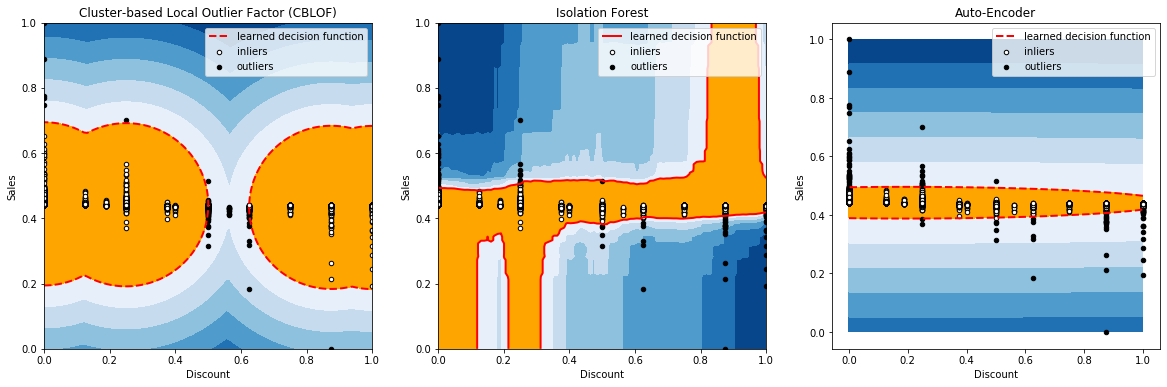

In [ ]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax_objs = [ax[0], ax[1], ax[2]]
models = [cblof_model, if_model, ae_model]
plot_titles = ['Cluster-based Local Outlier Factor (CBLOF)',
               'Isolation Forest',
               'Auto-Encoder']

for ax_obj, model, plot_title in zip(ax_objs, models, plot_titles):
    visualize_anomalies(model=model,
                        xx=xx, yy=yy,
                        data_df=subset_df,
                        ax_obj=ax_obj,
                        subplot_title=plot_title)
plt.axis('tight');
